In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle as pkl

from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import  RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


import warnings
warnings.filterwarnings("ignore")



In [14]:
data = pd.read_csv("Final_data.csv")
data.drop("Unnamed: 0", axis=1, inplace=True)
data.rename(columns={"label":"crop_name"}, inplace=True)
data

,temperature,humidity,ph,rainfall,crop_name,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,80,40,40
1,21.770462,80.319644,7.038096,226.655537,rice,80,40,40
2,23.004459,82.320763,7.840207,263.964248,rice,80,40,40
3,26.491096,80.158363,6.980401,242.864034,rice,80,40,40
4,20.130175,81.604873,7.628473,262.717340,rice,80,40,40
...,...,...,...,...,...,...,...,...
1495,20.002190,85.836182,7.116539,112.337046,pomegranate,20,10,40
1496,19.851393,89.807323,6.430163,102.818636,pomegranate,20,10,40
1497,21.254336,92.650589,7.159521,106.278467,pomegranate,20,10,40
1498,23.653741,93.326575,6.431266,109.807618,pomegranate,20,10,40


In [15]:
x = data[["temperature","humidity","ph","rainfall","N","P","K"]]
x

,temperature,humidity,ph,rainfall,N,P,K
0,20.879744,82.002744,6.502985,202.935536,80,40,40
1,21.770462,80.319644,7.038096,226.655537,80,40,40
2,23.004459,82.320763,7.840207,263.964248,80,40,40
3,26.491096,80.158363,6.980401,242.864034,80,40,40
4,20.130175,81.604873,7.628473,262.717340,80,40,40
...,...,...,...,...,...,...,...
1495,20.002190,85.836182,7.116539,112.337046,20,10,40
1496,19.851393,89.807323,6.430163,102.818636,20,10,40
1497,21.254336,92.650589,7.159521,106.278467,20,10,40
1498,23.653741,93.326575,6.431266,109.807618,20,10,40


In [16]:
y = data[["crop_name"]]
y

,crop_name
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
1495,pomegranate
1496,pomegranate
1497,pomegranate
1498,pomegranate


In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [18]:
def crop_pred(x1,x2,x3,x4,x5,x6,x7):
    x = np.array([[x1,2,x3,x4,x5,x6,x7]])
    return model.predict(x)


In [19]:
crop_pred(23.65,93.32,6.43,109.80,20,10,40)

array(['pomegranate'], dtype=object)

In [20]:
model = []
model.append(["Logistic", LogisticRegression()])
model.append(["Random Forest", RandomForestClassifier()])
model.append(["Decision Tree", DecisionTreeClassifier()])
model.append(["Extra Trees", ExtraTreeClassifier()])
model.append(["SVM", SVC()])
model.append(["AdaBoost", AdaBoostClassifier()])
model.append(["XGBoost", XGBClassifier()])
model.append(["Bagging", BaggingClassifier()])
model.append(["Gradient Boosting", GradientBoostingClassifier()])
model.append(["Gaussian", GaussianNB()])
model.append(["Multinominal", MultinomialNB()])

In [23]:
accuracy = []
model_name = []
for a,n in model:
    n.fit(x_train,y_train)
    pred = n.predict(x_test)
    accuracy.append(accuracy_score(pred, y_test))
    model_name.append(a)
data = pd.DataFrame(data={"model_name":model_name, "Accuracy":accuracy})
data = data.sort_values(by="Accuracy")
data

[15:10:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model_name,Accuracy
5,AdaBoost,0.363333
10,Multinominal,0.950000
4,SVM,0.966667
0,Logistic,0.980000
3,Extra Trees,0.980000
1,Random Forest,0.986667
9,Gaussian,0.986667
2,Decision Tree,0.990000
7,Bagging,0.990000
6,XGBoost,0.993333


<AxesSubplot:xlabel='Accuracy', ylabel='model_name'>

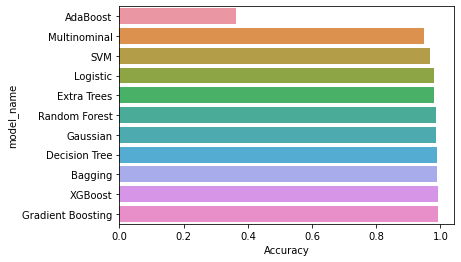

In [25]:
sns.barplot(x="Accuracy",y="model_name",data=data)

In [27]:
final_data = GradientBoostingClassifier()
final_data.fit(x_train,y_train)

GradientBoostingClassifier()

In [29]:
pkl.dump(final_data,open("final_model.pkl","wb"))

In [31]:
pickle = pkl.load(open("final_model.pkl","rb"))

In [32]:
pickle.predict(x_test)

array(['mango', 'coconut', 'grapes', 'orange', 'maize', 'maize', 'papaya',
       'apple', 'coffee', 'rice', 'grapes', 'maize', 'coffee', 'apple',
       'grapes', 'pomegranate', 'coconut', 'kidney beans', 'rice',
       'cotton', 'banana', 'jute', 'apple', 'rice', 'banana', 'papaya',
       'banana', 'mango', 'apple', 'coconut', 'coconut', 'kidney beans',
       'coffee', 'apple', 'banana', 'coconut', 'maize', 'apple', 'orange',
       'banana', 'kidney beans', 'coffee', 'jute', 'cotton', 'apple',
       'coconut', 'kidney beans', 'mango', 'coffee', 'orange', 'coffee',
       'cotton', 'black gram', 'coconut', 'papaya', 'jute', 'mango',
       'black gram', 'apple', 'grapes', 'coffee', 'rice', 'coffee',
       'grapes', 'kidney beans', 'pomegranate', 'mango', 'papaya',
       'coffee', 'maize', 'papaya', 'cotton', 'papaya', 'mango', 'papaya',
       'pomegranate', 'orange', 'grapes', 'jute', 'coffee', 'mango',
       'coconut', 'black gram', 'apple', 'rice', 'black gram', 'banana',
  